<a href="https://colab.research.google.com/github/fahadsultan/475_Demo/blob/main/PA_10_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>CSC-343 ARTIFICIAL INTELLIGENCE</h1>
<h1>PROGRAMMING ASSIGNMENT 10</h1>
<h1>BACK PROPAGATION</h1>
</center>

<br/>
<hr/>
<br/>

<center>

<a href="https://www.quantamagazine.org/brain-bursts-can-mimic-famous-ai-learning-strategy-20211018/"><img width="80%" style="float:left" src="https://d2r55xnwy6nx47.cloudfront.net/uploads/2021/10/branbackprop_2880x1620_lede.jpg"></a>

<center>

<br/>
<hr/>
<br/>

## Imports

In [ ]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Reading Data

In [ ]:
data  = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/uscities.csv', index_col='city')

In [ ]:
# river = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/savannah.csv', index_col = 0)
# river = river[280:-70]

data  = data[data['state_name'].apply(lambda x: x in ['Georgia', 'South Carolina', 'North Carolina'])]
data  = data[~data.index.duplicated(keep='last')]

X     = data[['lng', 'lat']]
y     = (data['state_name'] == 'South Carolina').astype(int)

## Plotting Data

In [ ]:
def plot_data(X, y, title):

  fig = plt.figure(figsize=(50, 20))

  ga, sc = X[y==0], X[y==1]

  for X_state, color in [(ga, "red"), (sc, "blue")]:

    plt.scatter(X_state['lng'], X_state['lat'], c=color, s=70, figure=fig)

    [plt.annotate(X_state.index[i],\
        (X_state.iloc[i]['lng'], X_state.iloc[i]['lat']), \
        fontsize=10) \
      for i in range(len(X_state.index))]

  plt.title(title, fontsize=30);
  plt.grid()

In [ ]:
# plot_data(X, y, title='Click to zoom')

# # plt.plot(river['0'], river['1'], linewidth=20, color='lightblue')

# plt.legend(['Georgia and North Carolina (y=0)', 'South Carolina (y=1)'], fontsize=50, markerscale=4);

# Normalize data

In [ ]:
X = X.apply(lambda x: (x-x.mean()) / x.std())
# X[0] = 1  #Done in the methods of Neural Network now

<br/>
<hr/>
<br/>

## Question 1.

Write a function that takes <u>**randomly**</u>  **splits** the data into **75% training** set and **25% test** set.


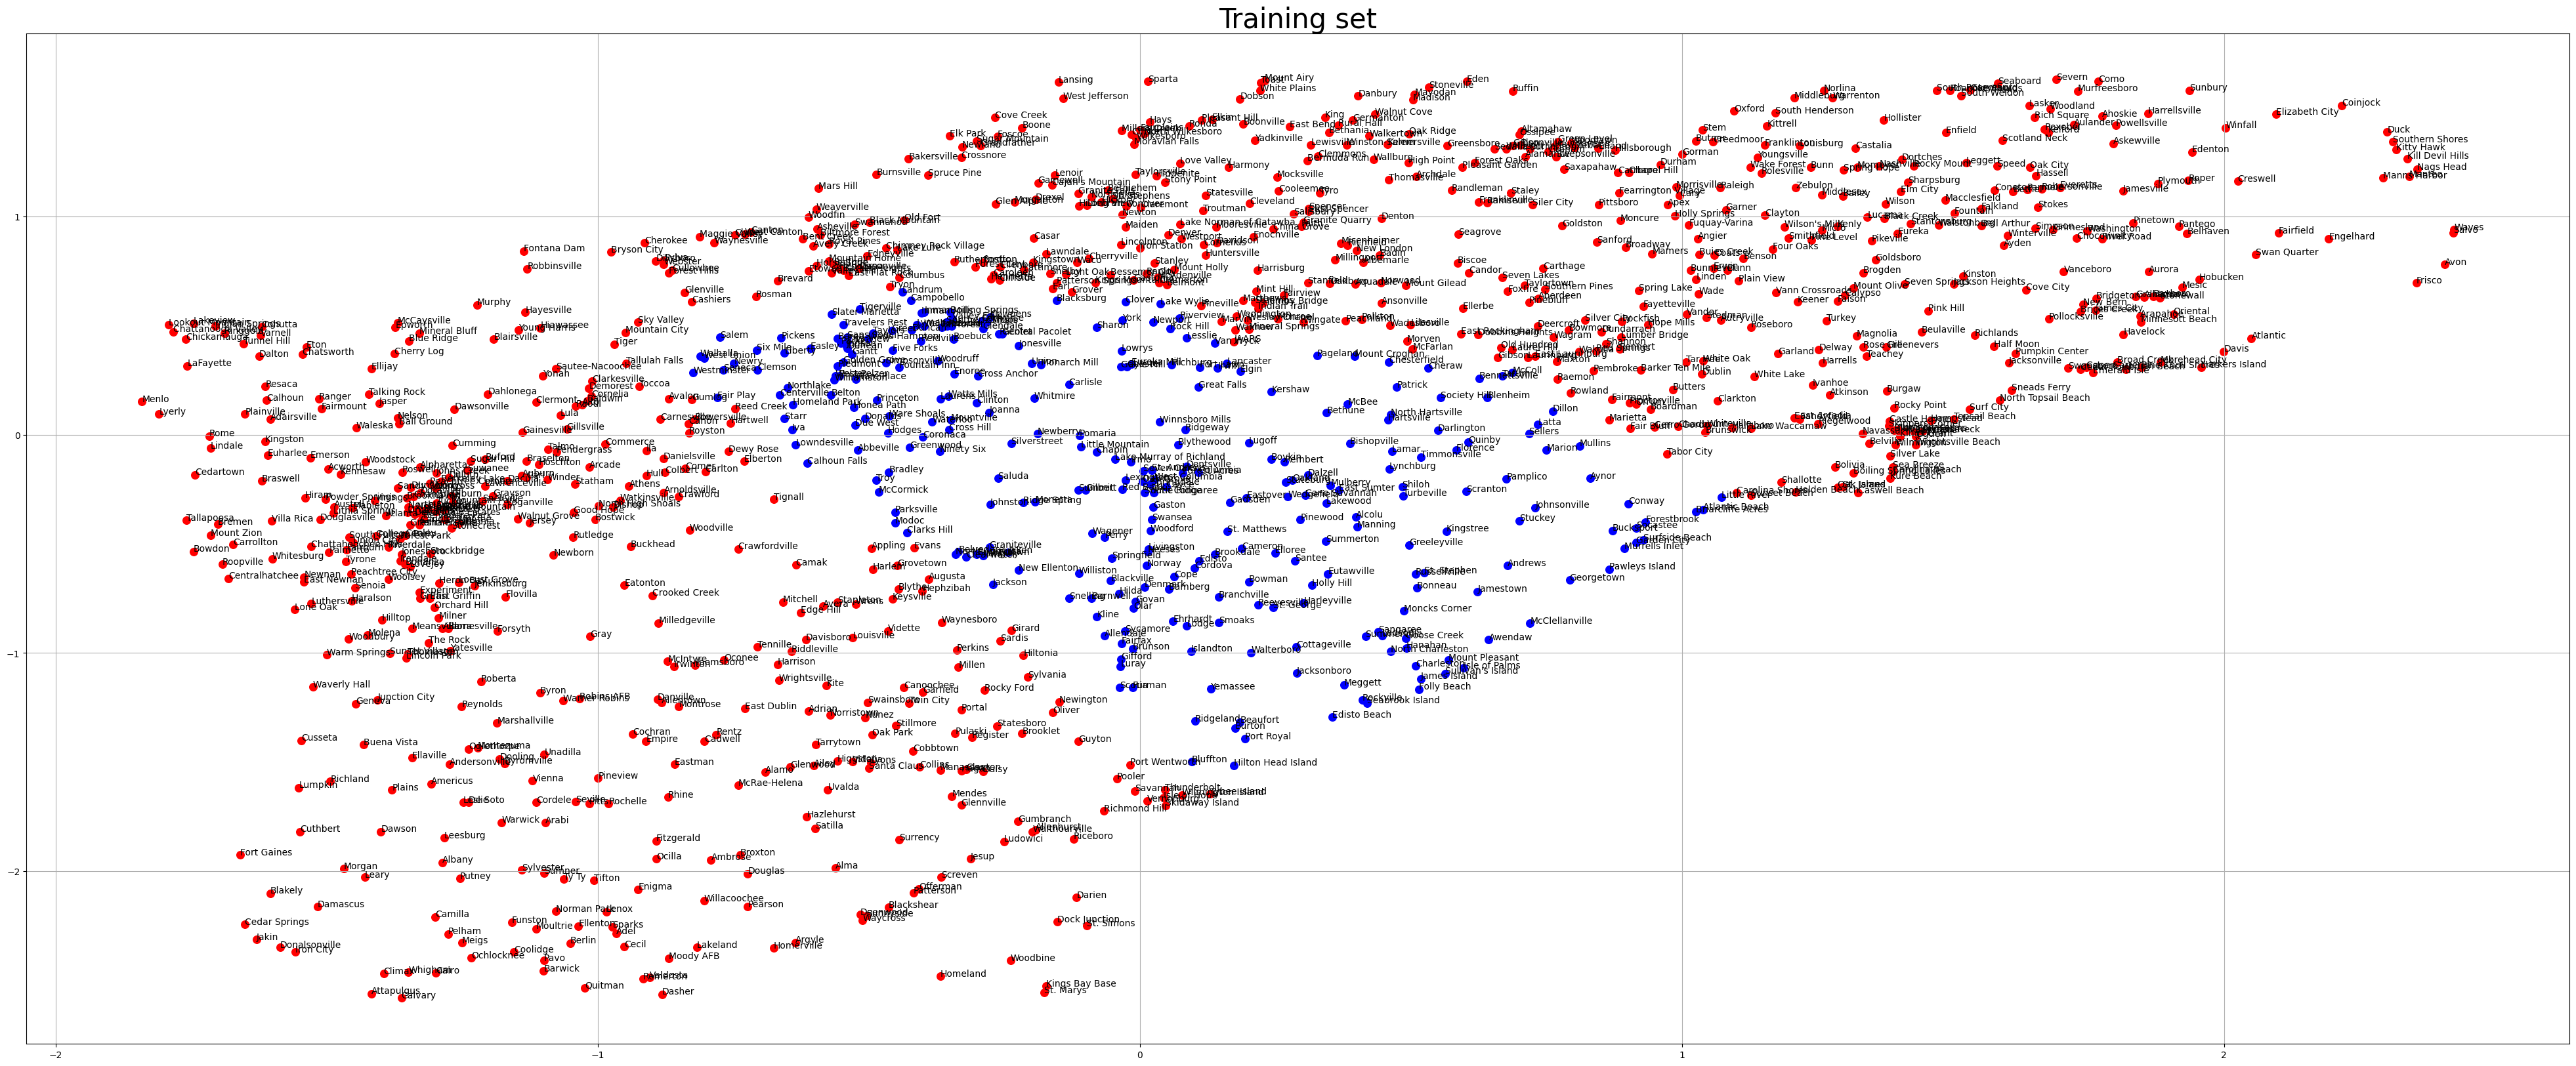

<Figure size 640x480 with 0 Axes>

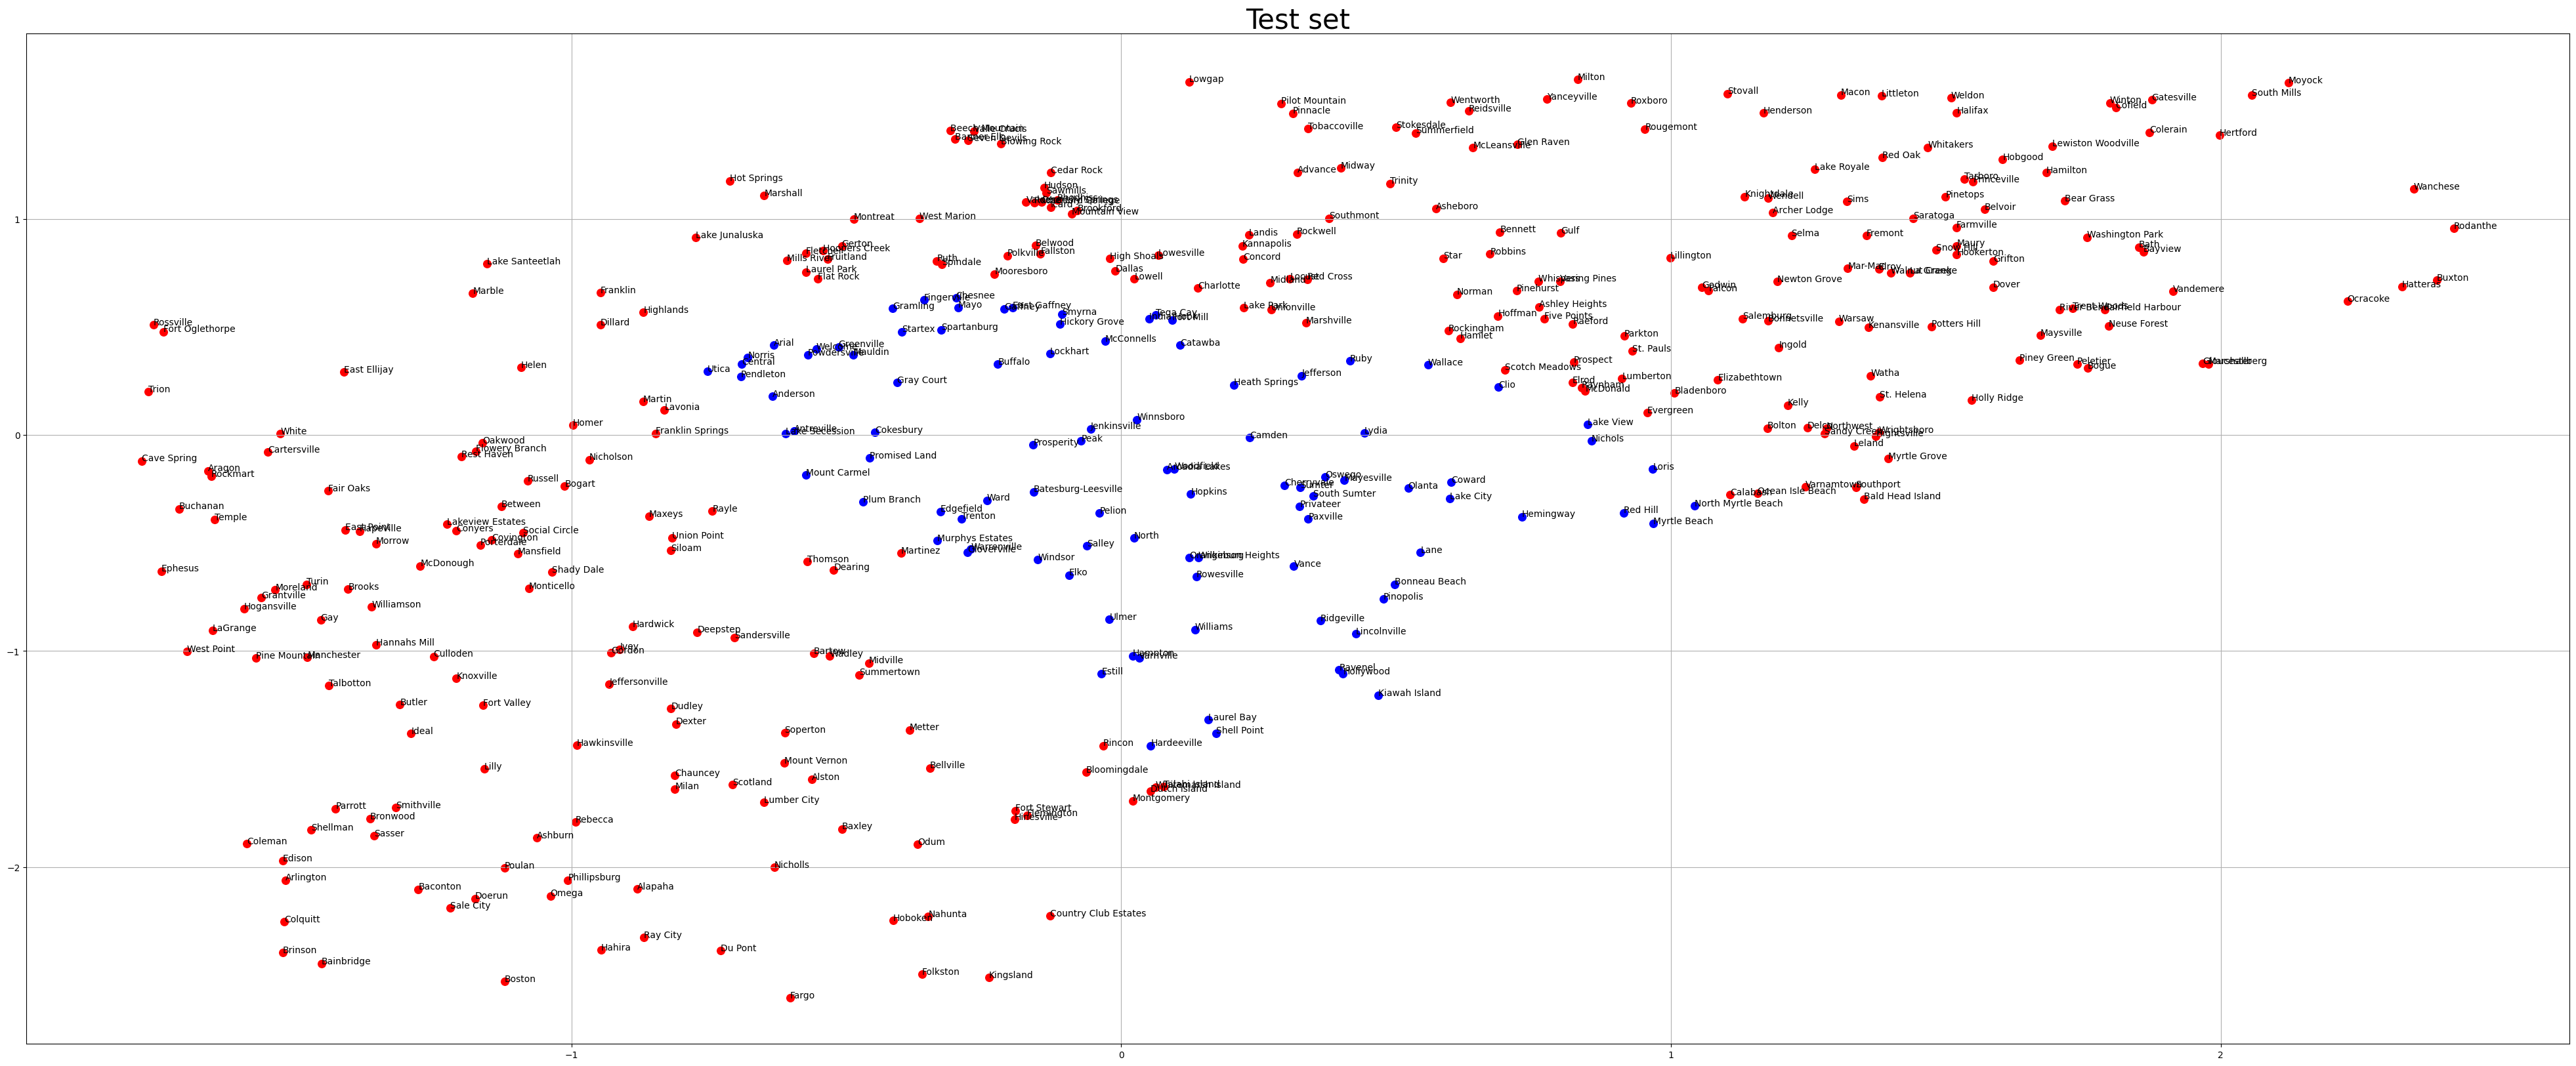

In [ ]:
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

plot_data(X_train, y_train, "Training set");
plt.figure();
plot_data(X_test, y_test, "Test set");

<br/>
<hr/>
<br/>

In [ ]:
y.value_counts()

0    1239
1     394
Name: state_name, dtype: int64

# Question 2.

Implement the **Backpropagation** algorithm to learn a complex decision boundary that decides if a given city is in South Carolina or not.

<br/>

<b>Use as many hidden layers as you like. Each of your hidden layers can have any number of neurons. </b>

<br/>
<!-- <img width="80%" src="https://raw.githubusercontent.com/fahadsultan/csc343/main/assets/imgs/backprop_2layers.png"> -->
<!--
Your code should take as **inputs**:

1. Data $~(\mathbf{X}$, $\mathbf{y}$)

  * where $\mathbf{X}_i$ represents (Longitude, Latitude) of $i^{th}$ city
  * $\mathbf{y}_i$ is $1$ if state of $i^{th}$ city is South Carolina and $0$ otherwise

2. Learning rate $~\alpha$
3. Max iterations $~\text{epoch}$

and returns as **output**:

* A matrix of weights $\mathbf{W}$ of dimensions ($\text{epoch} \times 3) $ where value $\mathbf{W}_{i, j}$ represents weight $w_j$ at epoch $i$.

    * That is, `len(weights) == epoch` _and_ `len(weights[0]) == 3`
\  -->

ONLY USE <u>TRAIN SET</u> FOR LEARNING!

100%|██████████| 100000/100000 [00:08<00:00, 12180.69it/s]


Accuracy:  0.9656862745098039


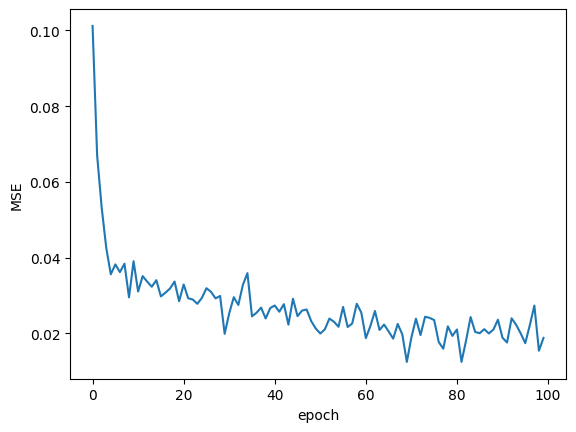

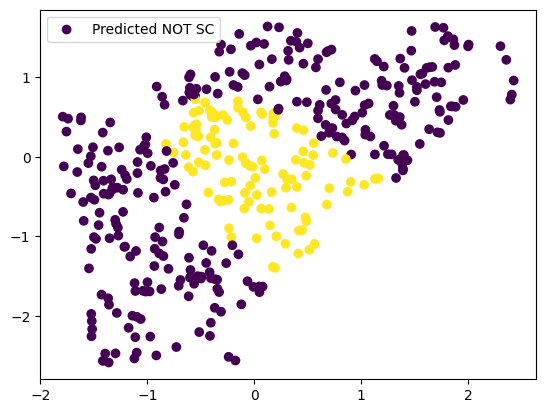

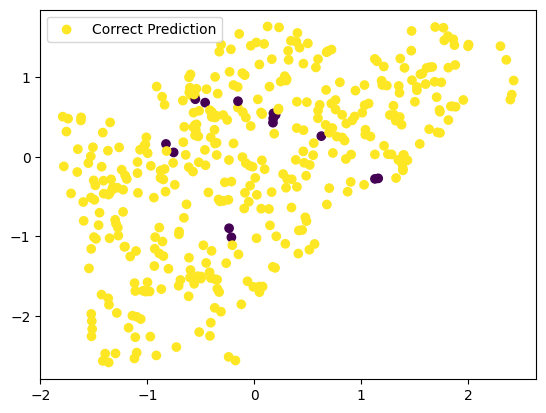

In [ ]:
from numpy.random import random, randint

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - x**2

class NeuralNetwork:

    def __init__(self, layers):

        self.activation_func = tanh
        self.activation_deriv = tanh_deriv

        self.weights = []
        for i in range(1, len(layers) - 1):
            r = random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2 * random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def backprop(self, X, y, learning_rate=0.2, epochs=100000):

        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)    #Appending bias: all 1s for x_0

        errors = []
        Ws = []

        for k in tqdm(range(epochs)):
            i = randint(X.shape[0])      #Stochastic
            activs = [X[i]]

            for l in range(len(self.weights)):
              dot_value = np.dot(activs[l], self.weights[l])
              activ = self.activation_func(dot_value)
              activs.append(activ)

            error = y[i] - activs[-1]
            deltas = [error * self.activation_deriv(activs[-1])]

            for l in range(len(activs) - 2, 0, -1):
              deltas.append(deltas[-1].dot(self.weights[l].T) * \
                            self.activation_deriv(activs[l]))

            deltas.reverse()

            for i in range(len(self.weights)):
              layer = np.atleast_2d(activs[i])
              delta = np.atleast_2d(deltas[i])
              self.weights[i] += learning_rate * np.dot(layer.T, delta)
              Ws.append(self.weights)

            errors.append(error[0]**2)

        return errors, Ws

    def forward(self, x):
        a = np.concatenate((np.ones(1).T, np.array(x)))
        for l in range(0, len(self.weights)):
            a = self.activation_func(np.dot(a, self.weights[l]))
        return a


nn = NeuralNetwork([2,2,10, 1])
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]
errors, Ws = nn.backprop(X_train, y_train)

preds = X_test.apply(nn.forward, axis=1)
preds = preds.apply(lambda x: round(x[0]))

print("Accuracy: ", sum(preds == y_test)/len(y_test))

err = [np.mean(errors[i*1000: (i+1)*1000]) for i in range(int(len(errors)/1000))];
plt.plot(err);
plt.xlabel('epoch');
plt.ylabel('MSE');

plt.figure();
plt.scatter(X_test['lng'], X_test['lat'], c=preds);
plt.legend(['Predicted NOT SC', 'not SC']);

plt.figure();
plt.scatter(X_test['lng'], X_test['lat'], c=preds==y_test);
plt.legend(['Correct Prediction']);

<br/>
<hr/>
<br/>

In [ ]:
preds.value_counts()

0    300
1    108
dtype: int64

In [ ]:
Ws[-1]

[array([[-2.20229782,  2.40935672, -3.67608183],
        [-2.66435431, -3.56886927, -5.6535914 ],
        [ 1.6884411 , -4.37877912, -3.037389  ]]),
 array([[-4.27814200e-03,  8.05290807e-03, -1.83590358e-01,
          8.05008317e-02,  4.54336573e+00, -4.75827106e-01,
          7.97515489e-03,  1.88544612e-02,  3.56758302e-01,
         -1.01413641e-02,  1.22730973e+00],
        [-1.18021648e-01, -2.60509542e-02,  2.42157631e-01,
         -1.90408757e-01, -4.33825121e+00,  5.36912332e-01,
          4.87458891e-02, -9.02282765e-02, -4.50022327e-01,
          5.80712205e-02, -1.14465847e+00],
        [ 6.71602067e-02,  8.12079208e-03, -2.99188216e+00,
          3.97792102e-02, -1.95229069e+00,  1.20155513e-01,
         -3.26487394e-02,  3.47219225e-02, -6.14532232e-02,
         -2.39701615e-02, -4.30127123e-01]]),
 array([[-0.02169337],
        [-0.00354802],
        [ 1.09219023],
        [-0.02395627],
        [-1.40325154],
        [ 0.03901641],
        [ 0.00971779],
        [-0.0135

In [ ]:
"""XOR Problem"""
nn = NeuralNetwork([2,2,1])
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])
errs, Ws = nn.backprop(X, y)
preds = pd.DataFrame(X).apply(nn.forward, axis=1)

100%|██████████| 100000/100000 [00:05<00:00, 19881.21it/s]


In [ ]:
Ws[-1]

[array([[-0.78439462,  1.11883434,  1.9824995 ],
        [-0.93589916, -2.6783673 , -1.37773234],
        [-1.5412562 , -2.90144132, -1.39865351]]),
 array([[ 0.8293269 ],
        [-2.68856722],
        [ 2.81844979]])]

<hr/>

# Question 3. Plot weights

Plot the evolution of weights during the learning process

<br/>
<hr/>
<br/>

# Question 4.

Compute Precision, Recall, F1-score for the <b><u>Training Data</u></b>

\

1. Precision
$$ \text{precision} = \frac{TP}{TP+FP}$$

2. Recall
$$ \text{recall} = \frac{TP}{TP+FN}$$
3. F1-score
$$ \text{F$_1$} = 2 \cdot \frac{precision \cdot recall}{precision+recall}$$

<br/>
<hr/>
<br/>

# Question 5. Compute score for test set

Evaluate your logistic regression model on the <u>**test set**</u> using the following evaluation metrics:

1. Recall
2. Precision
3. F1-score

<br/>
<hr/>
<br/>

<center><br/>

<a href="https://www.science.org/content/article/want-convince-someone-you-re-human-one-word-could-do-trick"><img width="50%" src="https://www.science.org/do/10.1126/science.aav4876/full/SS2862476-1280x720.jpg"></a>

</center>


<br/>
<hr/>
<br/>